In [6]:
symbol = 'BANKNIFTY'
lot = 25 # NIFTY=2 # BANKNIFTY =1
# today='28-Sep-2022'
day = 26
month ='Sep'
year = '2022'

In [7]:
if day < 10 :
    val ='0'+str(day)
    today = val+"-"+month+"-"+year
else:
    today = str(day)+"-"+month+"-"+year
# today

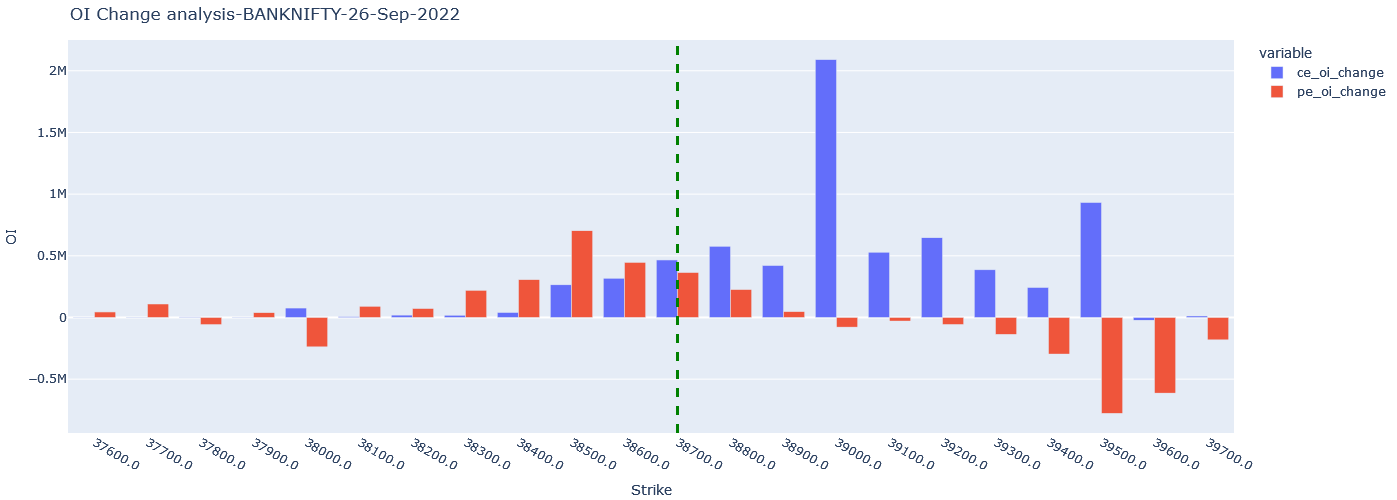

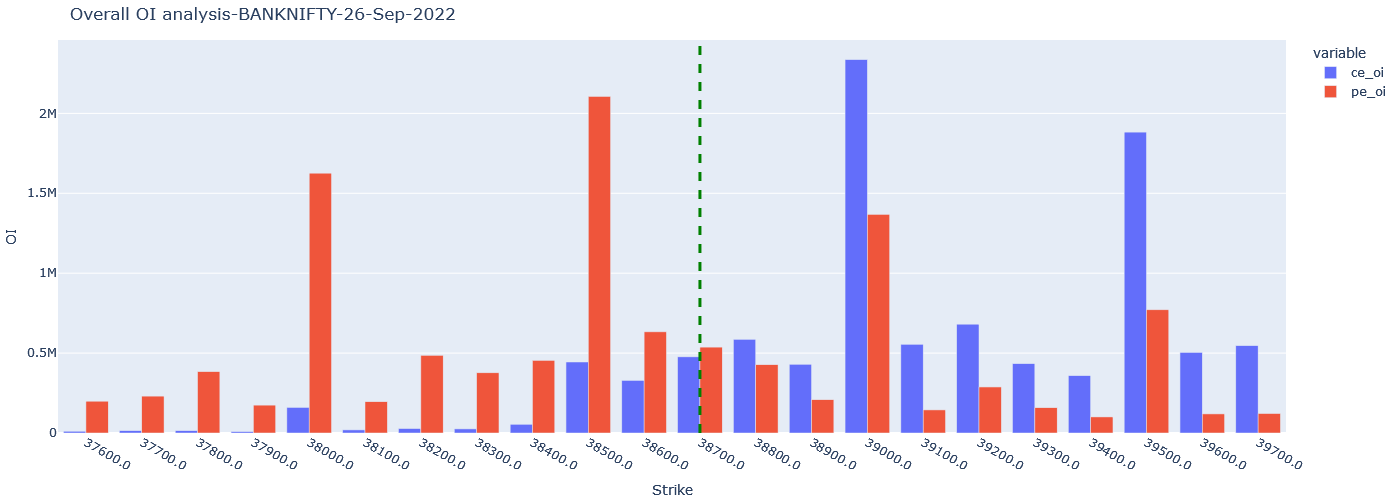

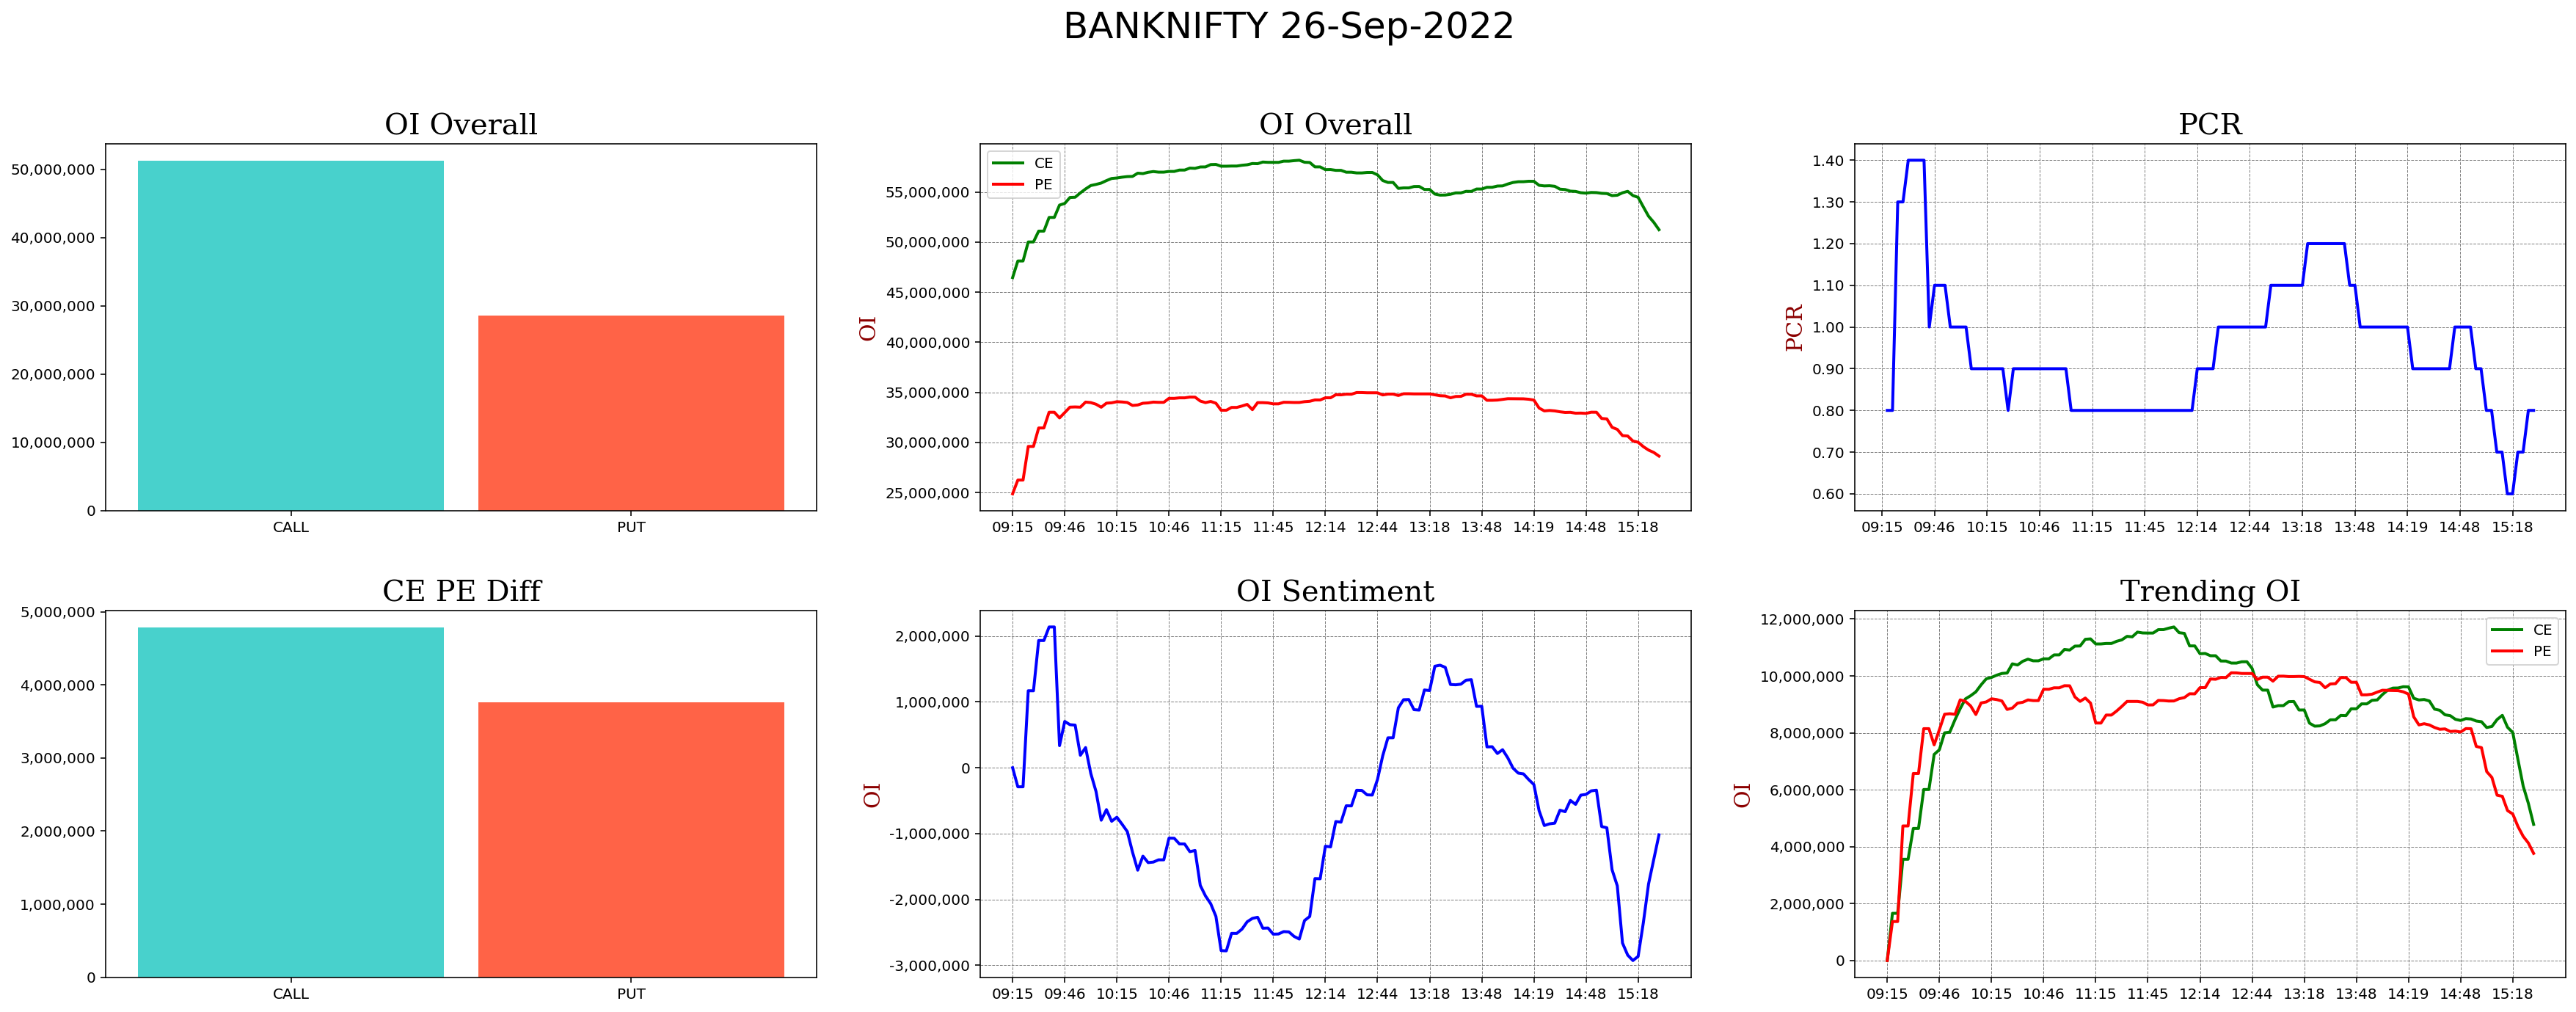

In [8]:
# symbol = 'BANKNIFTY'
# lot_size = 25 # NIFTY=2 # BANKNIFTY =1
# lot_size_option_chain =25 # NIFTY=50 # BANKNIFTY =25

def get_today_date():
    from datetime import datetime
    date_str = str(datetime.now())
    today=datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S.%f')
    return today.strftime('%d-%b-%Y')

def get_hh_mm_time(data_df):
    data_df["Time"] = pd.to_datetime(data_df["Time"])
    data_df["Time"] = data_df["Time"].dt.strftime('%H:%M')
    return data_df

def scientific_notation_on_off():
    current_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
    

def plot_repeat_usage(df,title):
    font1 = {'family':'serif','color':'black','size':20}
    font2 = {'family':'serif','color':'darkred','size':15}
    plt.title(title,fontdict =font1)
    # plt.legend(['CE','PE'])
    # plt.xlabel("Timestamp",fontdict =font2)
    plt.ylabel("OI",fontdict =font2)
    plt.xticks(rotation = 0)
    plt.xticks(np.arange(0, len(df["Time"])+1, 10))# tick labels every (5*3=15)15 min
    # plt.xticks(fontsize=15)
    # plt.yticks(fontsize=15)
    plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
    

def plot_line_chart_multi(df,x,y1,y2,title):
    plt.plot(df[x], df[y1], '-g',linewidth ='2')
    plt.plot(df[x], df[y2], '-r',linewidth ='2')
    plt.legend(['CE','PE'])
    plot_repeat_usage(df,title)
    scientific_notation_on_off()
  
    
def plot_line_chart_single(df,x,y1,title):
    plt.plot(df[x], df[y1], '-b',linewidth ='2')
    plot_repeat_usage(df,title)
    # scientific_notation_on_off()
    
    
def plot_bar_chart(df,y1,y2,title):
    font1 = {'family':'serif','color':'black','size':20}
    values=["CALL","PUT"]
    ce1=df[y1].iloc[-1]
    pe1=df[y2].iloc[-1]
    x1=[ce1,pe1]
    plt.title(title,fontdict =font1)
    plt.bar(values,x1,  color =['mediumturquoise','tomato'],
            width = 0.9)
    scientific_notation_on_off()

def get_path_filename(filename):
    path='D:\Jupyter Python\Stocks-office\json-csv\\'
    newFilename=path+filename
    return newFilename

def get_plot_oi_analysis(pece1,y1,y2,title):
    import plotly.express as px
     # this is for getting index value to plot vertical line
    # today = get_today_date()
    filename_pe_option_chain =  symbol +'-PE-OPTION-CHAIN-' + today + ".csv"
    filename_pe_option_chain = get_path_filename(filename_pe_option_chain)
    pe=pd.read_csv(filename_pe_option_chain)

    x=int(pe["underlying"][0])
    x =round(x/100)*100
    pece1=pece1.reset_index()

    dex=pece1[pece1["strike"]==x]

    x1=dex.index[0]
    
    fig = px.bar(pece1, x=pece1["strike"].astype(str), y=[y1,y2],barmode='group',title = "{}-{}-{}".format(title,symbol,today))
    fig.add_vline(x=x1, line_width=3, line_dash="dash", line_color="green")    

    fig.update_layout(autosize=True,xaxis_title="Strike", yaxis_title="OI", width=1200, height=500, showlegend=True, margin={"l":0,"r":0,"t":40,"b":0})
    fig.show()
    
def get_symbol_df(symbol,lot):
    
    # today = get_today_date()
    filename_OI_Chng = symbol + '-CHNG-IN-OI-' + today + ".csv"
    filename_OI_Total =  symbol + '-TOTAL-OI-' + today + ".csv"
    
    filename_OI_Chng=get_path_filename(filename_OI_Chng)
    filename_OI_Total=get_path_filename(filename_OI_Total)
   
    df_oi_change=pd.read_csv(filename_OI_Chng)
    df_oi_total=pd.read_csv(filename_OI_Total)
    # df_oi_total=pd.read_csv('CHNG-IN-OI-08-09-2022.csv')
    df_oi_change["CE_OI_CHNG"]=(df_oi_change["CE_OI_CHNG"]*lot)
    df_oi_change["PE_OI_CHNG"]=(df_oi_change["PE_OI_CHNG"]*lot)
    
    df_oi_total["CE_OI_TOTAL"]=(df_oi_total["CE_OI_TOTAL"]*lot)
    df_oi_total["PE_OI_TOTAL"]=(df_oi_total["PE_OI_TOTAL"]*lot)
    
    df_oi_change=get_hh_mm_time(df_oi_change)
    df_oi_change["PCR"] = round(df_oi_change["PE_OI_CHNG"]/df_oi_change["CE_OI_CHNG"],2)
    df_oi_change["CE_PE_diff"] = df_oi_change["PE_OI_CHNG"]-df_oi_change["CE_OI_CHNG"]
    df_oi_change =round(df_oi_change,1)
    df_oi_total=get_hh_mm_time(df_oi_total)
    
    return df_oi_change,df_oi_total

def get_oi_analysis_df(symbol,lot):
    # today = get_today_date()
    filename_ce_option_chain =  symbol +'-CE-OPTION-CHAIN-' + today + ".csv"
    filename_pe_option_chain =  symbol +'-PE-OPTION-CHAIN-' + today + ".csv"
    
    filename_ce_option_chain=get_path_filename(filename_ce_option_chain)
    filename_pe_option_chain=get_path_filename(filename_pe_option_chain)

    
    ce=pd.read_csv(filename_ce_option_chain)
    pe=pd.read_csv(filename_pe_option_chain)
    
    pe["oi"]=pe["oi"]*lot
    ce["oi"]=ce["oi"]*lot

    pe["oi_change"]=pe["oi_change"]*lot
    ce["oi_change"]=ce["oi_change"]*lot

    pe1 = pe[["oi","oi_change","strike",'underlying']]
    ce1 = ce[["oi","oi_change","strike"]]

    pe1.columns = ['pe_oi', 'pe_oi_change', 'strike','underlying']
    ce1.columns = ['ce_oi', 'ce_oi_change', 'strike']


    pece= pd.merge(pe1,ce1,on='strike')

    # row=pece[pece["ce_oi"] ==pece["ce_oi"].max()]

    # max= int(row.strike + 1200)
    # min= int(row.strike - 1200)
    max= int(pece['underlying'].iloc[-1]+ 1100)
    min= int(pece['underlying'].iloc[-1]- 1100)

    pece1 = pece.where((pece.strike <=max) & (pece.strike >=min)).dropna()
    
    return pece1   

 
######################### Main Program #############################
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%config InlineBackend.figure_format = 'retina'
import numpy as np
import time
import warnings
warnings.filterwarnings("ignore")
# today = get_today_date()


df_oi_change,df_oi_total = get_symbol_df(symbol,lot)
pece1 = get_oi_analysis_df(symbol,lot)

# Plotting various plots
plt.figure(figsize=(25,10))
plt.suptitle(symbol+f" {today}",fontsize=25)

plt.subplot(2, 3, 1)
plot_bar_chart(df_oi_total,'CE_OI_TOTAL','PE_OI_TOTAL','OI Overall')

plt.subplot(2, 3, 2)
plot_line_chart_multi(df_oi_total,'Time',"CE_OI_TOTAL","PE_OI_TOTAL","OI Overall")

plt.subplot(2, 3, 3)
plot_line_chart_single(df_oi_change,'Time','PCR',"PCR")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.2f}'.format(x) for x in current_values])
font2 = {'family':'serif','color':'darkred','size':15}
plt.ylabel("PCR",fontdict =font2)

plt.subplot(2, 3, 4)
plot_bar_chart(df_oi_change,'CE_OI_CHNG','PE_OI_CHNG','CE PE Diff')

plt.subplot(2, 3, 5)
plot_line_chart_single(df_oi_change,'Time','CE_PE_diff',"OI Sentiment")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.subplot(2, 3, 6)
plot_line_chart_multi(df_oi_change,'Time',"CE_OI_CHNG","PE_OI_CHNG","Trending OI")

get_plot_oi_analysis(pece1,'ce_oi_change','pe_oi_change',"OI Change analysis")

get_plot_oi_analysis(pece1,'ce_oi','pe_oi',"Overall OI analysis")

plt.tight_layout(pad=3)
plt.show()

In [9]:
# print(df_oi_change)

In [10]:
print(df_oi_change.sort_values(by='Time',ascending=False).to_string())

      Time  CE_OI_CHNG  PE_OI_CHNG  PCR  CE_PE_diff
128  15:30     4783300     3765350  0.8    -1017950
127  15:30     4783300     3765350  0.8    -1017950
126  15:30     4783300     3765350  0.8    -1017950
125  15:30     4783300     3765350  0.8    -1017950
124  15:28     5519675     4128500  0.8    -1391175
123  15:25     6128550     4364425  0.7    -1764125
122  15:22     7059825     4708175  0.7    -2351650
121  15:18     8012500     5149025  0.6    -2863475
120  15:15     8195100     5268300  0.6    -2926800
119  15:11     8615300     5770525  0.7    -2844775
118  15:09     8469375     5808725  0.7    -2660650
117  15:07     8224775     6432450  0.8    -1792325
116  15:03     8187200     6639000  0.8    -1548200
115  15:00     8391025     7480050  0.9     -910975
114  14:58     8415900     7523425  0.9     -892475
113  14:54     8486350     8145950  1.0     -340400
112  14:51     8500450     8149950  1.0     -350500
111  14:48     8434725     8030025  1.0     -404700
110  14:45  